In [260]:
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
import numpy as np

In [230]:
def convert_row_type(row: list[str], type_list: list[type]):
    return [to_type(value) if value else None for to_type, value in zip(type_list, row)]

In [231]:
def read_file(file_name: str, type_list: list[type], sep:str="#"):
    infile = open(file_name, "r")
    
    line = infile.readline()
    
    data_list = []
    
    while line != "":
        line = line.replace('\n', '').split(sep)            
        data_list.append(line)
        line = infile.readline()
    
    columns = data_list.pop(0)
    
    rows = [convert_row_type(line, type_list) for line in data_list]
    
    return pd.DataFrame(rows, columns=columns)

In [232]:
cars_df = read_file("cars_pa3.txt", type_list=[str, str, int, float])
cars_df.set_index('name')
display(cars_df)

,name,make,manufacture_year,price
0,rockstar,suv,2012,36000.0
1,suave,sedan,2012,33000.5
2,trend,truck,2012,42000.0
3,starship,suv,2014,45000.0
4,maverick,sedan,2015,25000.0
5,nebula,truck,2015,45000.0
6,spiral,sedan,2017,35000.0


In [233]:
reviews_df = read_file("reviews_pa3.txt", type_list=[int, str, str, int, str], sep='\t')
display(reviews_df)

,serial_no,name,date,rating,comment
0,1,rockstar,1-18-2019,3.0,It's alright. Gives me some trouble some ...
1,2,rockstar,5-11-2019,5.0,Awesome car. Love it.
2,3,suave,6-15-2019,4.0,Nice car. Have driven it quite a bit with mu...
3,4,trend,6-21-2019,3.0,Had issues with the brakes.
4,5,maverick,9-15-2019,3.0,Average car .
5,6,trend,12-18-2019,NaN,
6,7,suave,3-2-2020,2.0,I do not like it. Don't get it.
7,8,starship,5-1-2020,4.0,Nice car. Would recommend it.
8,9,rockstar,6-1-2020,NaN,None
9,10,spiral,1-6-2021,5.0,One of the best cards I've ever had!


In [234]:
def get_datetime(row, data_list:list):
    data_list.append(datetime.strptime(row["date"], "%m-%d-%Y"))

In [235]:
data_list = []
reviews_df.apply(lambda x: get_datetime(x, data_list), axis=1)

reviews_df["year"] = [date.year for date in data_list]
reviews_df["month"] = [date.month for date in data_list]

In [236]:
reviews_df['comment'] = reviews_df['comment'].apply(lambda comment: re.sub(r'\s+', ' ', comment).strip() if comment else '')
reviews_df['word_count'] = reviews_df['comment'].apply(lambda comment: len(re.findall(r'\b\S+\b', comment)))

In [237]:
display(reviews_df)

,serial_no,name,date,rating,comment,year,month,word_count
0,1,rockstar,1-18-2019,3.0,It's alright. Gives me some trouble some times.,2019,1,8
1,2,rockstar,5-11-2019,5.0,Awesome car. Love it.,2019,5,4
2,3,suave,6-15-2019,4.0,Nice car. Have driven it quite a bit with much...,2019,6,11
3,4,trend,6-21-2019,3.0,Had issues with the brakes.,2019,6,5
4,5,maverick,9-15-2019,3.0,Average car .,2019,9,2
5,6,trend,12-18-2019,NaN,,2019,12,0
6,7,suave,3-2-2020,2.0,I do not like it. Don't get it.,2020,3,8
7,8,starship,5-1-2020,4.0,Nice car. Would recommend it.,2020,5,5
8,9,rockstar,6-1-2020,NaN,,2020,6,0
9,10,spiral,1-6-2021,5.0,One of the best cards I've ever had!,2021,1,8


In [238]:
display(reviews_df['rating'].describe())
display(reviews_df['word_count'].describe())

count    18.000000
mean      3.500000
std       1.248529
min       1.000000
25%       3.000000
50%       3.500000
75%       4.750000
max       5.000000
Name: rating, dtype: float64

count    21.000000
mean      4.333333
std       3.439961
min       0.000000
25%       0.000000
50%       5.000000
75%       7.000000
max      11.000000
Name: word_count, dtype: float64

,count_2019,count_2020,count_2021
rating,,,
1.0,0,0,1
2.0,0,1,2
3.0,3,0,2
4.0,1,1,2
5.0,1,0,4


<Figure size 640x480 with 0 Axes>

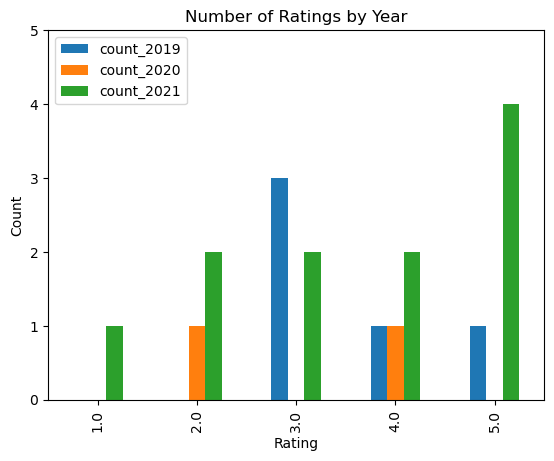

In [264]:
from operator import index


ratings_2019_df = reviews_df[reviews_df['year'] == 2019]['rating'].value_counts()
ratings_2020_df = reviews_df[reviews_df['year'] == 2020]['rating'].value_counts()
ratings_2021_df = reviews_df[reviews_df['year'] == 2021]['rating'].value_counts()

ratings_df_19_21 = pd.merge(ratings_2019_df, ratings_2020_df, how='outer', on='rating').fillna(0)
ratings_df_19_21 = pd.merge(ratings_df_19_21, ratings_2021_df, how='outer', on='rating').fillna(0)
ratings_df_19_21 = ratings_df_19_21.astype(int)
ratings_df_19_21 = ratings_df_19_21.sort_index(ascending=True)
ratings_df_19_21.columns = ["count_2019", "count_2020", "count_2021"]

display(ratings_df_19_21)

plt.figure()
ratings_df_19_21.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Number of Ratings by Year")
plt.yticks([0,1,2,3,4,5])
plt.show()